In [1]:
#Has the client subscribed term deposit?

In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Read the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/bank-full.csv')
df

,'age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y'
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [4]:
# One-Hot Encoding of categrical variables
df=pd.get_dummies(df,columns=["'job'","'marital'","'education'","'contact'","'poutcome'"])
df

,'age','default','balance','housing','loan','day','month','duration','campaign','pdays',...,"'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,"""no""",2143,"""yes""","""no""",5,"""may""",261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,"""no""",29,"""yes""","""no""",5,"""may""",151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,"""no""",2,"""yes""","""yes""",5,"""may""",76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,"""no""",1506,"""yes""","""no""",5,"""may""",92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,"""no""",1,"""no""","""no""",5,"""may""",198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""no""",825,"""no""","""no""",17,"""nov""",977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,"""no""",1729,"""no""","""no""",17,"""nov""",456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,"""no""",5715,"""no""","""no""",17,"""nov""",1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,"""no""",668,"""no""","""no""",17,"""nov""",508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [5]:
df.describe()

,'age','balance','day','duration','campaign','pdays','previous',"'job'_""admin.""","'job'_""blue-collar""","'job'_""entrepreneur""",...,"'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.513194,0.294198,0.041074,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.499831,0.455687,0.198464,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   'age'                    45211 non-null  int64 
 1   'default'                45211 non-null  object
 2   'balance'                45211 non-null  int64 
 3   'housing'                45211 non-null  object
 4   'loan'                   45211 non-null  object
 5   'day'                    45211 non-null  int64 
 6   'month'                  45211 non-null  object
 7   'duration'               45211 non-null  int64 
 8   'campaign'               45211 non-null  int64 
 9   'pdays'                  45211 non-null  int64 
 10  'previous'               45211 non-null  int64 
 11  'y'                      45211 non-null  object
 12  'job'_"admin."           45211 non-null  uint8 
 13  'job'_"blue-collar"      45211 non-null  uint8 
 14  'job'_"entrepreneur"     45211 non-nul

In [7]:
df.head()

,'age','default','balance','housing','loan','day','month','duration','campaign','pdays',...,"'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,"""no""",2143,"""yes""","""no""",5,"""may""",261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,"""no""",29,"""yes""","""no""",5,"""may""",151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,"""no""",2,"""yes""","""yes""",5,"""may""",76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,"""no""",1506,"""yes""","""no""",5,"""may""",92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,"""no""",1,"""no""","""no""",5,"""may""",198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [8]:
# To see all columns
pd.set_option("display.max.columns", None)
df

,'age','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','y',"'job'_""admin.""","'job'_""blue-collar""","'job'_""entrepreneur""","'job'_""housemaid""","'job'_""management""","'job'_""retired""","'job'_""self-employed""","'job'_""services""","'job'_""student""","'job'_""technician""","'job'_""unemployed""","'job'_""unknown""","'marital'_""divorced""","'marital'_""married""","'marital'_""single""","'education'_""primary""","'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,"""no""",2143,"""yes""","""no""",5,"""may""",261,1,-1,0,"""no""",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,"""no""",29,"""yes""","""no""",5,"""may""",151,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,"""no""",2,"""yes""","""yes""",5,"""may""",76,1,-1,0,"""no""",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,"""no""",1506,"""yes""","""no""",5,"""may""",92,1,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,"""no""",1,"""no""","""no""",5,"""may""",198,1,-1,0,"""no""",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""no""",825,"""no""","""no""",17,"""nov""",977,3,-1,0,"""yes""",0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,"""no""",1729,"""no""","""no""",17,"""nov""",456,2,-1,0,"""yes""",0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,"""no""",5715,"""no""","""no""",17,"""nov""",1127,5,184,3,"""yes""",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,"""no""",668,"""no""","""no""",17,"""nov""",508,4,-1,0,"""no""",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   'age'                    45211 non-null  int64 
 1   'default'                45211 non-null  object
 2   'balance'                45211 non-null  int64 
 3   'housing'                45211 non-null  object
 4   'loan'                   45211 non-null  object
 5   'day'                    45211 non-null  int64 
 6   'month'                  45211 non-null  object
 7   'duration'               45211 non-null  int64 
 8   'campaign'               45211 non-null  int64 
 9   'pdays'                  45211 non-null  int64 
 10  'previous'               45211 non-null  int64 
 11  'y'                      45211 non-null  object
 12  'job'_"admin."           45211 non-null  uint8 
 13  'job'_"blue-collar"      45211 non-null  uint8 
 14  'job'_"entrepreneur"     45211 non-nul

In [10]:
#Duplicates
df.duplicated()
df.duplicated().sum()

0

In [11]:
#Checking Null Values
df.isna()
df.isna().sum()

'age'                      0
'default'                  0
'balance'                  0
'housing'                  0
'loan'                     0
'day'                      0
'month'                    0
'duration'                 0
'campaign'                 0
'pdays'                    0
'previous'                 0
'y'                        0
'job'_"admin."             0
'job'_"blue-collar"        0
'job'_"entrepreneur"       0
'job'_"housemaid"          0
'job'_"management"         0
'job'_"retired"            0
'job'_"self-employed"      0
'job'_"services"           0
'job'_"student"            0
'job'_"technician"         0
'job'_"unemployed"         0
'job'_"unknown"            0
'marital'_"divorced"       0
'marital'_"married"        0
'marital'_"single"         0
'education'_"primary"      0
'education'_"secondary"    0
'education'_"tertiary"     0
'education'_"unknown"      0
'contact'_"cellular"       0
'contact'_"telephone"      0
'contact'_"unknown"        0
'poutcome'_"fa

In [12]:
# Custom Binary Encoding of Binary o/p variables
df["'default'"] = np.where(df["'default'"].str.contains("yes"), 1, 0)
df["'housing'"] = np.where(df["'housing'"].str.contains("yes"), 1, 0)
df["'loan'"] = np.where(df["'loan'"].str.contains("yes"), 1, 0)
df["'y'"] = np.where(df["'y'"].str.contains("yes"), 1, 0)
df

,'age','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','y',"'job'_""admin.""","'job'_""blue-collar""","'job'_""entrepreneur""","'job'_""housemaid""","'job'_""management""","'job'_""retired""","'job'_""self-employed""","'job'_""services""","'job'_""student""","'job'_""technician""","'job'_""unemployed""","'job'_""unknown""","'marital'_""divorced""","'marital'_""married""","'marital'_""single""","'education'_""primary""","'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,0,2143,1,0,5,"""may""",261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,"""may""",151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,"""may""",76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,"""may""",92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,"""may""",198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,"""nov""",977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,"""nov""",456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,"""nov""",1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,"""nov""",508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
# Find and Replace Encoding for month categorical variaible
df["'month'"].value_counts()

"may"    13766
"jul"     6895
"aug"     6247
"jun"     5341
"nov"     3970
"apr"     2932
"feb"     2649
"jan"     1403
"oct"      738
"sep"      579
"mar"      477
"dec"      214
Name: 'month', dtype: int64

In [14]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [15]:
df = df.replace(order)
df

,'age','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','y',"'job'_""admin.""","'job'_""blue-collar""","'job'_""entrepreneur""","'job'_""housemaid""","'job'_""management""","'job'_""retired""","'job'_""self-employed""","'job'_""services""","'job'_""student""","'job'_""technician""","'job'_""unemployed""","'job'_""unknown""","'marital'_""divorced""","'marital'_""married""","'marital'_""single""","'education'_""primary""","'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,0,2143,1,0,5,"""may""",261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,"""may""",151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,"""may""",76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,"""may""",92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,"""may""",198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,"""nov""",977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,"""nov""",456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,"""nov""",1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,"""nov""",508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   'age'                    45211 non-null  int64 
 1   'default'                45211 non-null  int32 
 2   'balance'                45211 non-null  int64 
 3   'housing'                45211 non-null  int32 
 4   'loan'                   45211 non-null  int32 
 5   'day'                    45211 non-null  int64 
 6   'month'                  45211 non-null  object
 7   'duration'               45211 non-null  int64 
 8   'campaign'               45211 non-null  int64 
 9   'pdays'                  45211 non-null  int64 
 10  'previous'               45211 non-null  int64 
 11  'y'                      45211 non-null  int32 
 12  'job'_"admin."           45211 non-null  uint8 
 13  'job'_"blue-collar"      45211 non-null  uint8 
 14  'job'_"entrepreneur"     45211 non-nul

In [17]:
#Splitting the data into training and testing set.

In [18]:
df.drop(columns=["'month'"],inplace=True)

In [19]:
df.head(10)

,'age','default','balance','housing','loan','day','duration','campaign','pdays','previous','y',"'job'_""admin.""","'job'_""blue-collar""","'job'_""entrepreneur""","'job'_""housemaid""","'job'_""management""","'job'_""retired""","'job'_""self-employed""","'job'_""services""","'job'_""student""","'job'_""technician""","'job'_""unemployed""","'job'_""unknown""","'marital'_""divorced""","'marital'_""married""","'marital'_""single""","'education'_""primary""","'education'_""secondary""","'education'_""tertiary""","'education'_""unknown""","'contact'_""cellular""","'contact'_""telephone""","'contact'_""unknown""","'poutcome'_""failure""","'poutcome'_""other""","'poutcome'_""success""","'poutcome'_""unknown"""
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
7,42,1,2,1,0,5,380,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
8,58,0,121,1,0,5,50,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
9,43,0,593,1,0,5,55,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [20]:
#Model Building and Model Predictions

In [21]:
# Dividing our data into input and output variables
x=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y=df.iloc[:,10]

In [22]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [23]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39209,   713],
       [ 4198,  1091]], dtype=int64)

In [26]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [27]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0
classifier.predict_proba(x)[:,1]

array([0.04995956, 0.02792158, 0.02114926, ..., 0.62604942, 0.05916671,
       0.1359354 ])

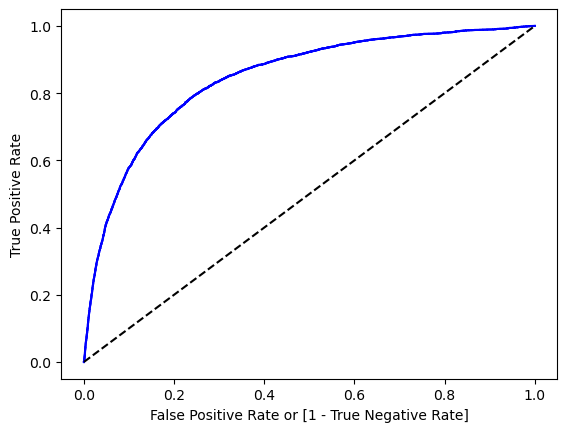

auc accuracy: 0.5942086761944346


In [28]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='blue')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)
